# Exemplos

Aqui vamos mostrar para você como utilizar o SDK da Fintz. 
É muito fácil. 

Primeiramente, você precisa de uma API Key para poder fazer
as chamadas. Nós providenciamos uma para você testar aqui:

```
chave-de-teste-api-fintz
```

Note que essa chave é bastante limitada. Dependendo de como
você utilizar você acabará recebendo erros 429 (too many
requests). Se precisar de uma chave melhor, entre em contato
pelo nosso formulário no site da Fintz:

https://fintz.com.br

In [1]:
import pandas as pd

In [2]:
API_KEY = 'chave-de-teste-api-fintz'

from fintz import Fintz
fintz = Fintz(API_KEY)

# Bolsa B3

Aqui abaixo mostraremos alguns métodos que da nossa SDK
para obter dados da B3.

## Histórico

Aqui vamos buscar dados históricos da PETR4. Esta chamada
retorna dados para os últimos 10 dias da bolsa.

In [3]:
df = fintz.bolsa.historico('PETR4')
df = pd.DataFrame(df)
df

,data,precoFechamento,precoAbertura,precoMinimo,precoMaximo,precoMedio,totalNegocios,qtdNegociados,volumeTotal,ticker,prazoTermo,dataVencimento
0,2023-02-02,24.52,25.51,24.42,25.81,24.99,8393,83823000,2.094981e+09,PETR4,,9999-12-31
1,2023-02-01,25.71,26.07,25.45,26.48,25.89,96472,56349200,1.459080e+09,PETR4,,9999-12-31
2,2023-01-31,26.07,25.63,25.52,26.21,25.91,90883,54048900,1.400647e+09,PETR4,,9999-12-31
3,2023-01-30,25.75,25.85,25.51,26.07,25.73,77701,40683200,1.046885e+09,PETR4,,9999-12-31
4,2023-01-27,25.62,26.18,25.44,26.23,25.72,68191,47681900,1.226537e+09,PETR4,,9999-12-31
5,2023-01-26,26.20,27.09,25.80,27.20,26.30,99361,73344800,1.929306e+09,PETR4,,9999-12-31
6,2023-01-25,26.94,26.55,26.01,27.08,26.62,81923,51832900,1.379937e+09,PETR4,,9999-12-31
7,2023-01-24,26.60,27.47,26.37,27.53,26.79,86244,65794000,1.762790e+09,PETR4,,9999-12-31
8,2023-01-23,26.79,26.27,26.13,27.60,27.07,40687,87678100,2.374022e+09,PETR4,,9999-12-31
9,2023-01-20,26.37,25.89,25.42,26.60,26.02,23956,114219500,2.972233e+09,PETR4,,9999-12-31


Este endpoint é páginado, ou seja, ele não retorna todos
os dados que nós temos de uma só vez. Sendo assim, você
pode passar os parâmetros `page` para obter mais dados.
Você também pode usar o parâmetro `size` para controlar
o tamanho da página.

Veja o exemplo abaixo:

In [4]:
df = fintz.bolsa.historico('PETR4', size=5)
df = pd.DataFrame(df)
df

,data,precoFechamento,precoAbertura,precoMinimo,precoMaximo,precoMedio,totalNegocios,qtdNegociados,volumeTotal,ticker,prazoTermo,dataVencimento
0,2023-02-02,24.52,25.51,24.42,25.81,24.99,8393,83823000,2.094981e+09,PETR4,,9999-12-31
1,2023-02-01,25.71,26.07,25.45,26.48,25.89,96472,56349200,1.459080e+09,PETR4,,9999-12-31
2,2023-01-31,26.07,25.63,25.52,26.21,25.91,90883,54048900,1.400647e+09,PETR4,,9999-12-31
3,2023-01-30,25.75,25.85,25.51,26.07,25.73,77701,40683200,1.046885e+09,PETR4,,9999-12-31
4,2023-01-27,25.62,26.18,25.44,26.23,25.72,68191,47681900,1.226537e+09,PETR4,,9999-12-31


Fácil fácil de utilizar com pandas :)

<AxesSubplot: xlabel='data'>

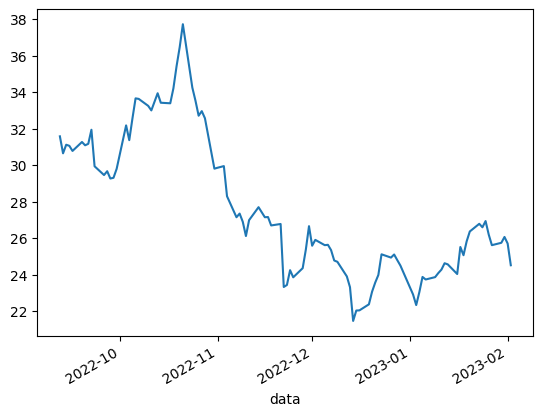

In [19]:
df = fintz.bolsa.historico('PETR4', size=100)
df = pd.DataFrame(df)
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)
df['precoFechamento'].plot.line()